## Detailed article explaination

The detailed code explanation for this article is available at the following link:

https://www.daniweb.com/programming/computer-science/tutorials/541022/facial-emotion-detection-with-vision-transformers-and-deepface-library

For my other articles for Daniweb.com, please see this link:

https://www.daniweb.com/members/1235222/usmanmalik57

In [ ]:
### Downloading Data From Kaggle

In [ ]:
from google.colab import files

! pip install -q kaggle

files.upload()

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
! kaggle datasets download -d msambare/fer2013

 68% 41.0M/60.3M [00:00<00:00, 217MB/s]
100% 60.3M/60.3M [00:00<00:00, 240MB/s]


In [ ]:
! unzip /content/fer2013.zip -d fer2013

Streaming output truncated to the last 5000 lines.
  inflating: fer2013/train/sad/Training_65242339.jpg  
  inflating: fer2013/train/sad/Training_65267116.jpg  
  inflating: fer2013/train/sad/Training_65275626.jpg  
  inflating: fer2013/train/sad/Training_6529266.jpg  
  inflating: fer2013/train/sad/Training_65329617.jpg  
  inflating: fer2013/train/sad/Training_65338712.jpg  
  inflating: fer2013/train/sad/Training_65338797.jpg  
  inflating: fer2013/train/sad/Training_65387162.jpg  
  inflating: fer2013/train/sad/Training_65404494.jpg  
  inflating: fer2013/train/sad/Training_65426218.jpg  
  inflating: fer2013/train/sad/Training_65430136.jpg  
  inflating: fer2013/train/sad/Training_65437377.jpg  
  inflating: fer2013/train/sad/Training_6545735.jpg  
  inflating: fer2013/train/sad/Training_65463385.jpg  
  inflating: fer2013/train/sad/Training_65473985.jpg  
  inflating: fer2013/train/sad/Training_65502829.jpg  
  inflating: fer2013/train/sad/Training_65505359.jpg  
  inflating: fer

In [ ]:
! pip install deepface

import os
import pandas as pd
from sklearn.model_selection import train_test_split

from deepface import DeepFace
import cv2
from matplotlib import pyplot as plt
from deepface import DeepFace
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, classification_report, accuracy_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 10.6 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116933 sha256=72d0d91bcd557c292fee63115e784289ec790f10c005f1521a0fca8c1cc1ba0a
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire
Directory  /root /.deepface created
Directory  /root /.deepface/weights created


## Data Preprocessing

In [ ]:
def get_emotions_df(root_folder):

  paths = []
  emotions = []

  # Iterate through sub-folders
  for emotion_folder in os.listdir(root_folder):
      emotion_path = os.path.join(root_folder, emotion_folder)

      # Check if the path is a directory
      if os.path.isdir(emotion_path):
          # Iterate through images in the sub-folder
          for image_file in os.listdir(emotion_path):
              # Construct the full path to the image
              image_path = os.path.join(emotion_path, image_file)

              # Append the image path and emotion to the lists
              paths.append(image_path)
              emotions.append(emotion_folder)

  # Create a DataFrame from the lists
  emotions_data = pd.DataFrame({'image path': paths, 'emotion': emotions})

  # Shuffle and display the DataFrame
  emotions_data = emotions_data.sample(frac=1).reset_index(drop=True)

  return emotions_data

In [ ]:
test_path = "/content/fer2013/test"
test_df = get_emotions_df(test_path)
print(test_df.shape)
test_df, val_df = train_test_split(test_df, test_size=0.5, random_state=42)


print(test_df.shape)
print(test_df['emotion'].value_counts())
test_df.head()

(7178, 2)
(3589, 2)
happy       908
sad         628
neutral     574
fear        530
angry       467
surprise    432
disgust      50
Name: emotion, dtype: int64


,image path,emotion
449,/content/fer2013/test/sad/PrivateTest_2602445.jpg,sad
2369,/content/fer2013/test/sad/PublicTest_40110702.jpg,sad
4623,/content/fer2013/test/neutral/PublicTest_70596...,neutral
3429,/content/fer2013/test/fear/PublicTest_24988488...,fear
4101,/content/fer2013/test/surprise/PrivateTest_841...,surprise


## Facial Emotion Detection

In [ ]:
def plot_image(image_path):
  image = cv2.imread(image_path)

  # OpenCV reads images in BGR format, but Matplotlib expects RGB, so we need to convert the color space
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # Plot the image using Matplotlib
  plt.imshow(image_rgb)
  plt.axis('off')  # Turn off axis labels
  plt.show()


fear


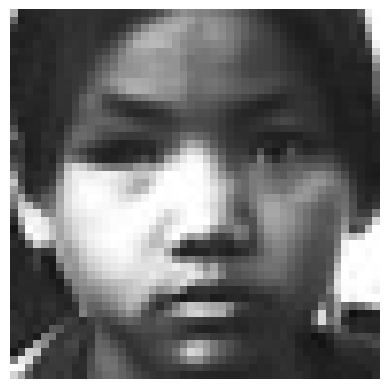

In [ ]:
print(test_df['emotion'].iloc[3])
image = test_df['image path'].iloc[3]
plot_image(image)

In [ ]:
emotions = DeepFace.analyze(img_path = image,
        actions = ['emotion'],
        enforce_detection = False
)
emotions

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 56.9MB/s]
Action: emotion: 100%|██████████| 1/1 [00:08<00:00,  8.39s/it]


[{'emotion': {'angry': 1.2721138074994087,
   'disgust': 0.00019647472981887404,
   'fear': 5.631708353757858,
   'happy': 0.23239075671881437,
   'sad': 18.769471347332,
   'surprise': 0.052765628788620234,
   'neutral': 74.04135465621948},
  'dominant_emotion': 'neutral',
  'region': {'x': 0, 'y': 0, 'w': 48, 'h': 48}}]

In [ ]:
# Extract the 'emotion' dictionary from the data
emotion_dict = emotions[0]['emotion']

# Find the emotion with the highest value
dominant_emotion = max(emotion_dict, key=emotion_dict.get)

print("Dominant Emotion:", dominant_emotion)

Dominant Emotion: neutral


In [ ]:
i = 0

def get_df_emotions(image, detector = 'opencv'):

  global i
  emotions = DeepFace.analyze(img_path = image,
                              actions = ['emotion'],
                              enforce_detection = False,
                              detector_backend = detector
                              )
  emotion = get_dominant_emotion(emotions)
  i = i + 1

  if i % 100 == 0:
    print("=================================")
    print(f"Number of images processed: {i}")
    print("=================================")

  return emotion

def get_dominant_emotion(emotions):
  emotion_dict = emotions[0]['emotion']

  # Find the emotion with the highest value
  dominant_emotion = max(emotion_dict, key=emotion_dict.get)

  return dominant_emotion

In [ ]:
pred_emotions_list = test_df['image path'].apply(get_df_emotions)


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 20.84it/s]


Number of images processed: 100


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.62it/s]


Number of images processed: 200


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.77it/s]


Number of images processed: 300


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 21.11it/s]


Number of images processed: 400


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 22.02it/s]


Number of images processed: 500


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 22.85it/s]


Number of images processed: 600


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 20.16it/s]


Number of images processed: 700


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.56it/s]


Number of images processed: 800


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.29it/s]


Number of images processed: 900


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 21.77it/s]


Number of images processed: 1000


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.58it/s]


Number of images processed: 1100


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 21.27it/s]


Number of images processed: 1200


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 22.13it/s]


Number of images processed: 1300


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 21.31it/s]


Number of images processed: 1400


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 21.43it/s]


Number of images processed: 1500


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 20.77it/s]


Number of images processed: 1600


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 20.47it/s]


Number of images processed: 1700


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 20.19it/s]


Number of images processed: 1800


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 21.73it/s]


Number of images processed: 1900


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 21.58it/s]


Number of images processed: 2000


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 20.97it/s]


Number of images processed: 2100


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 20.16it/s]


Number of images processed: 2200


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.88it/s]


Number of images processed: 2300


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.74it/s]


Number of images processed: 2400


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.96it/s]


Number of images processed: 2500


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.87it/s]


Number of images processed: 2600


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 21.09it/s]


Number of images processed: 2700


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 21.56it/s]


Number of images processed: 2800


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 22.11it/s]


Number of images processed: 2900


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 20.72it/s]


Number of images processed: 3000


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.02it/s]


Number of images processed: 3100


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 21.48it/s]


Number of images processed: 3200


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 21.21it/s]


Number of images processed: 3300


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.67it/s]


Number of images processed: 3400


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 21.27it/s]


Number of images processed: 3500


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 21.83it/s]


In [ ]:
label_encoder = LabelEncoder()
y_true = label_encoder.fit_transform(test_df['emotion'])
y_pred = label_encoder.transform(pred_emotions_list)

In [ ]:
print(classification_report(y_true, y_pred))
print(accuracy_score(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.43      0.47       467
           1       0.51      0.36      0.42        50
           2       0.39      0.43      0.41       530
           3       0.79      0.76      0.78       908
           4       0.44      0.53      0.48       574
           5       0.42      0.42      0.42       628
           6       0.77      0.69      0.73       432

    accuracy                           0.56      3589
   macro avg       0.55      0.52      0.53      3589
weighted avg       0.57      0.56      0.56      3589

0.5594873223739203


## Classification Using Vision Transformer

In [ ]:
! pip install accelerate -U
! pip install datasets transformers[sentencepiece]

In [ ]:
from transformers import ViTModel, ViTFeatureExtractor, ViTModel, AdamW
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from datasets import load_dataset
import os
from PIL import Image
import random
import numpy as np

In [ ]:
train_path = "/content/fer2013/train"
train_df = get_emotions_df(train_path)
print(train_df.shape)

(28709, 2)


In [ ]:
label_encoder = LabelEncoder()
train_df['emotion'] = label_encoder.fit_transform(train_df['emotion'])
test_df['emotion'] = label_encoder.transform(test_df['emotion'])
val_df['emotion'] = label_encoder.transform(val_df['emotion'])


In [ ]:
model_checkpoint = "google/vit-base-patch16-224-in21k"
image_processor = ViTFeatureExtractor.from_pretrained(model_checkpoint)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
class ImageClassificationDataset(Dataset):
    def __init__(self, data_df, image_processor):
        self.data_df = data_df
        self.image_processor = image_processor
        #self.max_length = 256 # set a fixed maximum length

    def __len__(self):
        return len(self.data_df)

    def __getitem__(self, index):

        image_path = self.data_df.iloc[index]['image path']
        image_val = Image.open(image_path)

        if image_val.mode != 'RGB':
          image_val = image_val.convert('RGB')

        image_encodings = image_processor(image_val, return_tensors="pt")

        labels = self.data_df.iloc[index][['emotion']].values.astype(int)

        return image_encodings, labels

In [ ]:
train_dataset = ImageClassificationDataset(train_df, ViTFeatureExtractor)
test_dataset = ImageClassificationDataset(test_df, ViTFeatureExtractor)
val_dataset = ImageClassificationDataset(val_df, ViTFeatureExtractor)

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:

class EmotionClassifier(nn.Module):
    def __init__(self, num_labels, encoder):
        super(EmotionClassifier, self).__init__()
        self.encoder = encoder
        self.classifier = nn.Sequential(
            nn.Linear(self.encoder.config.hidden_size, 1000),
            nn.ReLU(),
            nn.Linear(1000, 500),
            nn.ReLU(),
            nn.Linear(500, 300),
            nn.ReLU(),
            nn.Linear(300, 100),
            nn.ReLU(),
            nn.Linear(100, 50),
            nn.ReLU(),
            nn.Linear(50, num_labels),
        )

    def forward(self, input_values):
        outputs = self.encoder(pixel_values = input_values)
        pooled_output = outputs['last_hidden_state'][:, 0, :]
        logits = self.classifier(pooled_output)
        return logits


In [ ]:
# Set up the model, optimizer, scheduler, and loss function
num_labels = train_df["emotion"].nunique()
encoder = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k")
model = EmotionClassifier(num_labels, encoder).to(device)
optimizer = AdamW(model.parameters(), lr=0.0001, betas=(0.9, 0.999), eps=1e-08)
criterion = nn.CrossEntropyLoss()

In [ ]:
# Define the training function
def train(model, train_loader, val_loader, optimizer,  criterion, device, num_epochs):

    best_accuracy = 0.0

    for epoch in range(num_epochs):

        model.train()

        for i, batch in enumerate(train_loader):

            image_encodings,  labels = batch
            pixel_values = image_encodings.pixel_values
            pixel_values = pixel_values.squeeze()
            pixel_values = pixel_values.to(device)

            labels = labels.view(-1)
            labels = labels.to(device)

            optimizer.zero_grad()

            logits = model(pixel_values)

            loss = criterion(logits, labels)
            loss.backward()

            optimizer.step()

            if (i+1) % batch_size == 0:
                print(f'Epoch {epoch+1}/{num_epochs}, Batch {i+1}/{len(train_loader)}, Train Loss: {loss.item() :.4f}')
                train_loss = 0.0

        val_loss, val_accuracy, val_f1, _ , _ = evaluate(model, val_loader, device)

        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            torch.save(model.state_dict(), 'best_model.pt')

        print("========================================================================================")
        print(f'Epoch {epoch+1}/{num_epochs}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}, Val F1: {val_f1:.4f}, Best Accuracy: {best_accuracy:.4f}')
        print("========================================================================================")


In [ ]:
def evaluate(model, data_loader,  device):

    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():

        for i, batch in enumerate(data_loader):

          image_encodings,  labels = batch
          pixel_values = image_encodings.pixel_values
          pixel_values = pixel_values.squeeze()
          pixel_values = pixel_values.to(device)

          labels = labels.view(-1)
          labels = labels.to(device)

          optimizer.zero_grad()

          logits = model(pixel_values)

          loss = criterion(logits, labels)
          total_loss += loss.item()

          _, preds = torch.max(logits, 1)
          all_labels.append(labels.cpu().numpy())
          all_preds.append(preds.cpu().numpy())

    all_labels = np.concatenate(all_labels, axis=0)
    all_preds = np.concatenate(all_preds, axis=0)

    loss = total_loss / len(data_loader)
    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average = 'macro')
    return loss, accuracy, f1, all_labels, all_preds


In [ ]:
num_epochs = 5
train(model, train_loader, val_loader, optimizer, criterion, device, num_epochs)

Epoch 1/5, Batch 32/898, Train Loss: 0.2654
Epoch 1/5, Batch 64/898, Train Loss: 0.0880
Epoch 1/5, Batch 96/898, Train Loss: 0.3776
Epoch 1/5, Batch 128/898, Train Loss: 0.2414
Epoch 1/5, Batch 160/898, Train Loss: 0.3099
Epoch 1/5, Batch 192/898, Train Loss: 0.2078
Epoch 1/5, Batch 224/898, Train Loss: 0.2073
Epoch 1/5, Batch 256/898, Train Loss: 0.2448
Epoch 1/5, Batch 288/898, Train Loss: 0.2586
Epoch 1/5, Batch 320/898, Train Loss: 0.2284
Epoch 1/5, Batch 352/898, Train Loss: 0.1465
Epoch 1/5, Batch 384/898, Train Loss: 0.1543
Epoch 1/5, Batch 416/898, Train Loss: 0.0921
Epoch 1/5, Batch 448/898, Train Loss: 0.2166
Epoch 1/5, Batch 480/898, Train Loss: 0.2532
Epoch 1/5, Batch 512/898, Train Loss: 0.2621
Epoch 1/5, Batch 544/898, Train Loss: 0.1887
Epoch 1/5, Batch 576/898, Train Loss: 0.1975
Epoch 1/5, Batch 608/898, Train Loss: 0.2291
Epoch 1/5, Batch 640/898, Train Loss: 0.1418
Epoch 1/5, Batch 672/898, Train Loss: 0.2312
Epoch 1/5, Batch 704/898, Train Loss: 0.1049
Epoch 1/5, Ba

In [ ]:
state_dict = torch.load('best_model.pt')

model = EmotionClassifier(num_labels, encoder).to(device)
model.load_state_dict(state_dict)

_, _, _, all_labels, all_preds = evaluate(model, test_loader, device)

print(classification_report(all_labels, all_preds))
print(accuracy_score(all_labels, all_preds))

              precision    recall  f1-score   support

           0       0.51      0.64      0.57       483
           1       0.78      0.64      0.71        56
           2       0.54      0.54      0.54       495
           3       0.90      0.86      0.88       906
           4       0.69      0.61      0.65       595
           5       0.58      0.57      0.58       637
           6       0.80      0.80      0.80       417

    accuracy                           0.69      3589
   macro avg       0.69      0.67      0.68      3589
weighted avg       0.69      0.69      0.69      3589

0.685427695736974


In [ ]:
DeepFace.analyze